In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
    
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
np.set_printoptions(linewidth=200)
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 254, 254, 238,  70,   0

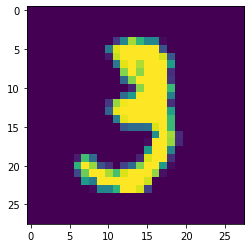

In [4]:
plt.imshow(x_train[10])

In [5]:
def train_mnist(x_train, y_train, x_test, y_test):
    
    # Callback class
    class modelCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    # Instantiates modelCallback class
    callbacks = modelCallback()
    
    # Normalize pixel values between 0 and 1
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    # Model architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    # Fits the model (passes the instance of the modelCallback class to the callbacks parameter)
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
    
    return history.epoch, history.history['accuracy'][-1]

In [6]:
train_mnist(x_train, y_train, x_test, y_test)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2030 - accuracy: 0.9403
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0811 - accuracy: 0.9750
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0528 - accuracy: 0.9839
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0356 - accuracy: 0.9891
Epoch 5/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9909
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0276 - accuracy: 0.9909


([0, 1, 2, 3, 4], 0.99091667)